#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesperson Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

## Delivering
**Deadline**: *Friday, February 19, 2021*
**Devilry**: https://devilry.ifi.uio.no

## What to deliver?
On the Devilry website, upload one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: if you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesperson, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases.

In [2]:
import csv
from itertools import permutations
from sys import maxsize
import time
import random
import statistics

def read_file(cNum):
    """
    Reads the european_cities.csv file, and returns graph representing the cities 
    
    Args:
        cNum(int):  Number of cities we want to work with
        
    Returns:
        graph(list): List of lists with float as values in each list, that represents distance
                     to each other. (city)
    """
    graph = []
    with open('european_cities.csv') as file:
        reader = csv.reader(file, delimiter =';')
        counter = 0
        for row in reader:
            if counter > 0:
                graph.append(list(map(float, [row[x] for x in range(cNum)])))
            counter += 1
            if counter == cNum+1:
                break
    return graph

def exhaustive_search(cNum, graph):
    """
    Guaranteed to find the shortest path from start across all the nodes and back to start. (TSP)
    
    I use permutation function to find all possible combination of the paths, and by checking
    distance for everypath, program will be able to find the shortest one.
    
    Args:
        cNum(int):   Number of cities we want to work with
        graph(list): List of lists with float as values in each list, that represents distance 
                     to each other. (city)
        
    Returns:
        minCost(float):       Minimal distance from start, through all nodes, back to start
        minCombination(list): List with spesific path from start, through all nodes, back to start
                              that in total gives the lowest distance.
    """
    iList = [i for i in range(cNum)] # list with values from
    
    minCombination = [] # holds list with minimal distances from city to city
    minCost = maxsize # holds minimal cost for the minCombination cities list
    permObj = permutations(iList) # Get all permutations with given list

    for perm in list(permObj): # perm is a list with spesific permutation
        posMinCost = 0 # possible minimal cost
        for i in range(cNum):
            posMinCost += graph[perm[i - 1]][perm[i]]
        
        if posMinCost < minCost: # we found new minimum
            minCost = posMinCost
            minCombination = perm
        
    return minCost, minCombination

numberOfCities = 6
graph = read_file(numberOfCities)
startTime = time.time()
minCost, minCombo = exhaustive_search(numberOfCities, graph)
print(f"Number of cities: {numberOfCities}  Minimal distance: ", minCost)
print(f"Permutation: {minCombo}")
print(f"Takes {(time.time() - startTime)} seconds\n")

numberOfCities = 7
graph = read_file(numberOfCities)
startTime = time.time()
minCost, minCombo = exhaustive_search(numberOfCities, graph)
print(f"Number of cities: {numberOfCities}  Minimal distance: ", minCost)
print(f"Permutation: {minCombo}")
print(f"Takes {(time.time() - startTime)} seconds\n")

# numberOfCities = 8
# graph = read_file(numberOfCities)
# startTime = time.time()
# minCost, minCombo = exhaustive_search(numberOfCities, graph)
# print(f"Number of cities: {numberOfCities}  Minimal distance: ", minCost)
# print(f"Permutation: {minCombo}")
# print(f"Takes {(time.time() - startTime)} seconds\n")

# numberOfCities = 9
# graph = read_file(numberOfCities)
# startTime = time.time()
# minCost, minCombo = exhaustive_search(numberOfCities, graph)
# print(f"Number of cities: {numberOfCities}  Minimal distance: ", minCost)
# print(f"Permutation: {minCombo}")
# print(f"Takes {(time.time() - startTime)} seconds\n")

# numberOfCities = 10
# graph = read_file(numberOfCities)
# startTime = time.time()
# minCost, minCombo = exhaustive_search(numberOfCities, graph)
# print(f"Number of cities: {numberOfCities}  Minimal distance: ", minCost)
# print(f"Permutation: {minCombo}")
# print(f"Takes {(time.time() - startTime)} seconds\n")


Number of cities: 6  Minimal distance:  5018.8099999999995
Permutation: (1, 0, 3, 2, 5, 4)
Takes 0.0011682510375976562 seconds

Number of cities: 7  Minimal distance:  5487.889999999999
Permutation: (2, 6, 3, 0, 1, 4, 5)
Takes 0.0058476924896240234 seconds



What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

**Solution**

If we think city at index 0 is A (Barcelona), 1 is B (Belgrade) and 10 is J:
<br>
So solution for the shortest tour for 10 cities is: **(8, 3, 7, 0, 1, 9, 4, 5, 2, 6) => (I->D->H->A->B->J->E->F->C->G->(I))** - where G goes back to I (start node in this permutation)
<br>
The distance is: 7486.309999999999 **(Hamburg->Brussels->Dublin->Barcelona->Belgrade->Istanbul->Bucharest->Budapest->Berlin->Copenhagen)**
<br>
It took on average **5** seconds. (while 9 cities took 5/10 seconds)
<br>
It takes 10 times more time to calculate for each new city. So if we think that 10 cities is 5 seconds = $5 * 10^{0}$, so for 24 cities:
<br>
24-10=14 => 5 * 10^14 s = (5 * 10^14)*86400 days = 15844043.907 years

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**.

In [3]:
def new_solutions(solution, cNum):
    """
    Makes new permutation lists with small changes from the given 'best' solution, by doing small 
    changes in solution

    First I was thinking to do swap mutation many times (as in permutation representation), and compare if
    one list is not equal to other lists. But because of time complexity it didn't worked out. So I got
    insperation for this code from towardsdatascience.com website, section about hill climbing.
    
    For each double iteration solution list is copied and the two elements is beeing swaped, because
    of the structurer of the code, the different new solutions are uniqe. 
    
    Args:
        solution(list): Permutation list where each value represents the city. The list itself gives
                        us information about order we travel through all cities
        cNum(int):      Number of cities we work with
        
    Returns:
        closeSolutionList(list): Each index is a permutation list that is slightly different from 
                                 the solution, that may or may not give better distance results.
    """
    
    closeSolutionList = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            newSolution = solution.copy()
            newSolution[i] = solution[j]
            newSolution[j] = solution[i]
            closeSolutionList.append(newSolution)
    return closeSolutionList


def find_distance(perm, graph, cNum):
    """
    Finds the distances from the start node, through all nodes, and back to the start node. 
    
    Args:
        perm(list):  List with permutation where each index is the index of the city in the graph.
                     This list represents order of the cities we are traveling.
        graph(list): List of lists with float as values in each list, that represents distance 
                     to each other. (city)
        cNum(int):   Number of cities we want to work with
        
    Returns:
        distance(float): The distance of the trip from the randomStart list
    """
    distance = 0    
    for i in range(cNum):
        distance += graph[perm[i - 1]][perm[i]]
  
    
    return distance

def random_start(cNum, graph):
    """
    Makes list with randomly order of the cities.
    
    Creates a list that contains indexes that represents each city from 0 to number of cities.
    Then using the random.shuffle to get a 'random' starting point.
    
    Args:
        cNum(int):   Number of cities we want to work with
        graph(list): List of lists with float as values in each list, that represents distance 
                     to each other. (city)
        
    Returns:
        randomStart(list): Random permutation list with length cNum
        distance(float):   The distance of the trip from the randomStart list
    """
    
    randomStart = [i for i in range(cNum)]
    random.shuffle(randomStart)

    distance = find_distance(randomStart, graph, cNum)
    return randomStart, distance
    
    
def best_solution(newSolutions, graph, cNum):
    """
    Finds best solution from the list of solutions
    
    Args:
        newSolutions(list): List of all new permutations
        cNum(int):          Number of cities we are work with
        graph(list):        List of lists with float as values in each list, that represents 
                            distance to each other. (city)
        
    Returns:
        solBestL(list):      Permutation that had shortest distance
        solShortDist(float): The distance of the trip from the solBestL cities
    """
    solShortDist = maxsize
    solBestL = []
    for solution in newSolutions:
        dist = find_distance(solution, graph, cNum)
        if dist < solShortDist:
            solShortDist = dist
            solBestL = solution   
    return solBestL, solShortDist
                
def hill_climbing(graph, cNum):
    """
    Finds best solution with the shortest distance from the given graph
    
    Args:
        cNum(int):   Number of cities we are work with
        graph(list): List of lists with float as values in each list, that represents 
                     distance to each other. (city)
        
    Returns:
        currentBest(list):   Permutation that had shortest distance
        bestDistance(float): The distance of the trip from the currentBest cities
    """
    currentBest, bestDistance = random_start(cNum, graph) # gets random start list 
    newSolutions = new_solutions(currentBest,cNum) # list of all new solutions

    # finds best new solution
    solBestL, solShortDist = best_solution(newSolutions, graph, cNum)
            
    while solShortDist < bestDistance:
        bestDistance = solShortDist
        currentBest = solBestL
        newSolutions = new_solutions(currentBest,cNum)
        solBestL, solShortDist = best_solution(newSolutions, graph, cNum)

    return currentBest, bestDistance
    
    
# Right distance for 10 cities: 7486.309999999999
# 10 cities time test:
timeList = [] # contains all running times
solutionDistance = [] # contain all distances we got
numberOfCities = 10
graph = read_file(numberOfCities)
for i in range(20):
    startTime = time.time()
    bestSolution, bestDistance = hill_climbing(graph, numberOfCities)
    timeList.append(time.time() - startTime)
    solutionDistance.append(bestDistance)
    
#     print(f"Number of cities: {numberOfCities}  Minimal distance: ", bestDistance)
#     print(f"Permutation: {bestSolution}")
#     print(f"Takes {(time.time() - startTime)} seconds\n") # 0.0009527206420898438 seconds (4*10^4 faster than exh search)
print("10 cities:\n--------------------------------------------")
print(f"Best distance: {min(solutionDistance)}")
print(f"Worst distance: {max(solutionDistance)}")
print(f"Mean distance: {sum(solutionDistance)/numberOfCities}")
print(f"Standard deviation: {statistics.stdev(solutionDistance)}")
print(f"\nMean time: {sum(timeList)/numberOfCities}")



timeList = [] # contains all running times
solutionDistance = [] # contain all distances we got
numberOfCities = 24
graph = read_file(numberOfCities)
for i in range(20):
    startTime = time.time()
    bestSolution, bestDistance = hill_climbing(graph, numberOfCities)
    timeList.append(time.time() - startTime)
    solutionDistance.append(bestDistance)


print("\n24 cities:\n--------------------------------------------")
print(f"Best distance: {min(solutionDistance)}")
print(f"Worst distance: {max(solutionDistance)}")
print(f"Mean distance: {sum(solutionDistance)/numberOfCities}")
print(f"Standard deviation: {statistics.stdev(solutionDistance)}")
print(f"\nMean time: {sum(timeList)/numberOfCities}")

10 cities:
--------------------------------------------
Best distance: 7486.309999999999
Worst distance: 8349.939999999999
Mean distance: 15274.223999999997
Standard deviation: 266.4477005974796

Mean time: 0.0007319450378417969

24 cities:
--------------------------------------------
Best distance: 12605.079999999998
Worst distance: 16027.400000000001
Mean distance: 11989.769166666667
Standard deviation: 849.9349535860788

Mean time: 0.011489142974217733


## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.



Working with size 50 population

6 cities (Population: 50):
-------------------------------
Best distance: 5018.8099999999995
Worst distance: 5018.8099999999995
Mean distance: 16729.36666666666
Standard deviation: 0.0

Mean time: 0.2548917531967163


Working with size 150 population

6 cities (Population: 150):
-------------------------------
Best distance: 5018.8099999999995
Worst distance: 5018.8099999999995
Mean distance: 16729.36666666666
Standard deviation: 0.0

Mean time: 0.7746763229370117


Working with size 300 population

6 cities (Population: 300):
-------------------------------
Best distance: 5018.8099999999995
Worst distance: 5018.8099999999995
Mean distance: 16729.36666666666
Standard deviation: 0.0

Mean time: 1.7004324197769165


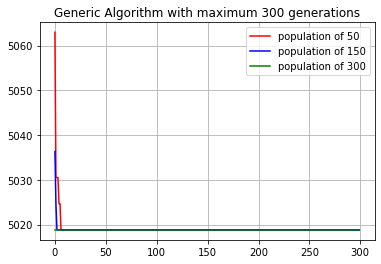

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

def pmx(a, b, start, stop):
    """
    Main part of Partially mapped crossover. Does main calculations and operations for pmx crossover
    
    Args:
        a(list):     First parent
        b(list):     Second parent
        start(int):  start of the "part of the list", the part that we just copy from a
        stop(int):   end of the "part of the list"
        
    Returns:
        child(list): Child after crossover
    """
    child = [None]*len(a)
    
    # Copy a slice from first parent:
    child[start:stop] = a[start:stop]
    
    # Map the same slice in parent b to child using indices from parent a:
    for ind, x in enumerate(b[start:stop]):
        ind += start
        if x not in child:
            while child[ind] != None:
                ind = b.index(a[ind])
            child[ind] = x
    # Copy over the rest fruom parent b
    for ind, x in enumerate(child):
        if x == None:
            child[ind] = b[ind]
            
    return child


def pmx_pair(a, b):
    """
    Start of Partially mapped crossover crossover.
    
    Args:
        a(list):  First parent
        b(list):  Second parent
    Returns:
        c1(list): First child after crossover
        c1(list): Second child after crossover
    """
    half = len(a) // 2
    start = np.random.randint(0, len(a)-half)
    stop = start+half
    return pmx(a, b, start, stop), pmx(b, a, start, stop)


def mutation(path, cNum, rate):
    """
    Goes through each index in path, and with given prosentage changes given index 
    with another random index
    Mutation rate is high at the start and will be lower closer to the end
    rate = 1(50%) rate = 4(25%) rate = 10 (10%) ....
    
    Args:
        path(list): List with permutation where each index is the index of the city in the graph.
                    This list represents order of the cities we are traveling.
        cNum(int):  Number of cities we are work with
        rate(int):  Used in randint(0,rate), in other word it is upper limit for random number
    """
    
    # swaps 2 cities in path with a x% chance
    for i in range(0, len(path)):
        randNum = random.randint(0,rate)
        if randNum == 0:
            changeWith = random.randint(0,cNum-1) # -1, to not get outofrange
            while changeWith == i: # so we won't swap index with the same index
                changeWith = random.randint(0,cNum-1)
            tmp = path[i]
            path[i] = path[changeWith]
            path[changeWith] = tmp
    

def crossover(population, pSize, graph, cNum, curGen, maxGen):
    
    """
    Takes 2 parents and makes 2 children given number of times.
    In my case I will only use half of the list for parent crossover (the best half of the population)
    Or else population will grow 2 times, that will make sorting slower
    
    Args:
        population(list): Contains all members of population. Each member is a list with 2 indexes
        pSize(int):       Population size that we working with
        graph(list):      List of lists with float as values in each list, that represents 
                          distance to each other. (city)
        cNum(int):        Number of cities we are work with
        curGen(int):      Current generation number
        maxGen(int):      Max generation number we can have
        
    Returns:
        kids(list):       List with all new child members (each child is a list with 2 elements)
    """
    kids = []
    half = pSize//2
    if half % 2 != 0: # to be sure we have even number of parents
        half += 1
    half -= 1 # from last element number to "last index position"
    for i in range(0,half,2):
        p1 = population[i]
        p2 = population[i+1]
        ch1, ch2 = pmx_pair(p1[0], p2[0])
        
        proc = curGen*100/maxGen # procentage of current evolution from max evolution
        if proc < 25:
            rate = 2 # 50% mutation rate
        elif proc > 25 and proc <= 50:
            rate = 4 # 25%
        elif proc > 50 and proc <= 75:
            rate = 10 # 10%
        else: # > 75
            rate = 20 # 5%

        mutation(ch1, cNum, rate)
        mutation(ch2, cNum, rate)
        
        kids.append([ch1, find_distance(ch1, graph, cNum)])
        kids.append([ch2, find_distance(ch2, graph, cNum)])

    return kids
  
    
def sort_select(population, pSize):
    """
    Sorts population (from lowest to highest) by using the second index of each list in the population.
    And after that deletes dublicates from 25% of population list start 
    
    Args:
        population(list):  Contains all members of population. Each member is a list with 2 indexes
        pSize(int):        Population size that we working with
        
    Returns:
        population(list):  Population list but only from 0 to population size
    """
    population.sort(key=takeSecond)
    
    # deletes dublicates from 25% of first, so we won't come out of range
    for i in range(pSize//4):
        for j in range(i+1,pSize//4):
            if population[i] == population[j]:
                population.pop(j)
    
    # check population size
    return population[0:pSize] # takes only population size, all others will be gone 
    

def create_population(size, graph, cNum):
    """
    Creates start population with given graph and number of cities we will work with
    
    Args:
        size(int):        Population size that we working with
        graph(list):      List of lists with float as values in each list, that represents 
                          distance to each other. (city)
        cNum(int):        Number of cities we are work with
        
    Returns:
        population(list): Contains all members of population. Each member is a list with 2 indexes
    """
    population = []
    for i in range(size):
        path, distance = random_start(cNum, graph)
        #Individual chromosome: ([path], fitness)
        # I decided to have fitness as distance, so the smaller fitness (distance) the better it is
        population.append([path, distance])
    return population


def genetic_algorithm(population, maxGen, pSize, graph, cNum):
    """
    This function is start for genetic algorithm, it's constantly checking if generation
    number is not higher than maxGen. And if it is False, so it calls for sort_select function,
    and crossover function.
    
    Args:
        population(list): Contains all members of population. Each member is a list with 2 indexes
        maxGen(int):      Max generation number we can have
        pSize(int):       Population size that we working with
        graph(list):      List of lists with float as values in each list, that represents 
                          distance to each other. (city)
        cNum(int):        Number of cities we are work with
        
    Returns:
        fitness(list):    List that contains all best fitnesses for each generation for given population
        population(list): Contains all members of population. Each member is a list with 2 indexes   
    """
    generation = 0 # number of evolutions  (Maybe can change to 'number of same top 1 paths')
    fitness = []
    while generation <= maxGen:
        population = sort_select(population, pSize)
        fitness.append(population[0][1])
        population += crossover(population, pSize, graph, cNum, generation, maxGen)
        generation += 1
    return fitness, population
    
    
def takeSecond(elem):
    # take second element for sort
    return elem[1]


def print_out(cNum, pSize, solutionDistance, timeList):
    """
    Prints out needed information in a nice way
    
    Args:
        cNum(int):              Number of cities we are work with 
        pSize(int):             Population size that we working with
        solutionDistance(list): Best solution list from all 20 runs
        timeList(list):         List of time that it takes to run GA for each of 20 runs
    """
    print(f"\n{cNum} cities (Population: {pSize}):\n-------------------------------")
    print(f"Best distance: {min(solutionDistance)}")
    print(f"Worst distance: {max(solutionDistance)}")
    print(f"Mean distance: {sum(solutionDistance)/cNum}")
    print(f"Standard deviation: {statistics.stdev(solutionDistance)}")
    print(f"\nMean time: {sum(timeList)/cNum}")
    
    
def plot_three(fitnesForAllThree, populationSizeList, maxGen):
    """
    Plots the graph that shows avarage fitness for each generation. (also avarage from 20 runs)
    For all three population sizes
    
    Args:
        fitnesForAllThree(list):  List with 3 lists, where each index represents each population size.
                                  Each list in this list have length of maxGen and each index have value
                                  of avarage best fitness for given generation
        populationSizeList(list): List with all three population sizes
        maxGen(int):              Max generation number we can have
         
    """
    plt.plot(fitnesForAllThree[0], color='red', label=f"population of {populationSizeList[0]}")
    plt.plot(fitnesForAllThree[1], color='blue', label=f"population of {populationSizeList[1]}")
    plt.plot(fitnesForAllThree[2], color='green', label=f"population of {populationSizeList[2]}")
    plt.legend()
    plt.title(f"Generic Algorithm with maximum {maxGen} generations")
    plt.grid()
    plt.show()
        
    
def main(numberOfCities, populationSizeList):
    """
    This is a start point of hole code. It makes graph, and defines max generation number,
    and calls for genetic_algorithm function.
    After 20 runs for each population it finds avarage fitness for each generation. and saves it
    in the fitnesForAllThreee list.
    
    Args:
        populationSizeList(list): List with all three population sizes
        numberOfCities(int):      Number of cities we are work with  
    """
    graph = read_file(numberOfCities)
    fitnesForAllThree = []
    
    for pSize in populationSizeList:
        maxGen = 300 # maximum number of evolutions per population
        timeList = [] # contains all running times
        solutionDistance = [] # contain all distances we got
        print(f"\n\nWorking with size {pSize} population")
        populationFitness = []
        for i in range(20):
            population = create_population(pSize, graph, numberOfCities)
            startTime = time.time()
            avarageFitness, population = genetic_algorithm(population, maxGen, pSize, graph, numberOfCities)
            populationFitness.append(avarageFitness)
            timeList.append(time.time() - startTime)
            solutionDistance.append(population[0][1])  # check here
        print_out(numberOfCities, pSize, solutionDistance, timeList)
        
        # find avarage for 20 runs
        avarageFitness = []
        for i in range(maxGen):
            totFitness = 0
            for j in range(20):
                totFitness += populationFitness[j][i]
            avarageFitness.append(totFitness/20)
            
        fitnesForAllThree.append(avarageFitness)
    
    plot_three(fitnesForAllThree, populationSizeList, maxGen)
      
main(6, [50, 150, 300])

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

1. GA found shortest tour for 10 cities in all populations (50,150,300). That is 7486.309999999999
   Mutation rate is 50%: for < 25% generation
                    25%: for < 50% and > 25% generation
                    10%: for < 75% and > 50% generation
                    5% : for < 75% and > 50% generation
   Number of generation: 300
   

2. Problem here is that different settings in GA can change running time, so it is really hard to tell, because it is possible to find solution with much shorter time with good settings for each task.<br>
But we can continue to use all settings I had in first answer. However, I will use only 300 population for average time. Because it finds right answer for both 10 and 24 cities<br>
Time for 10 cities (Exhaustive search): **4.592648983001709 seconds**<br>
Time for 24 cities (Exhaustive search): **15844043.907 years**<br>
Time for 10 cities (GA): **1.367115068435669 seconds**<br>
Time for 24 cities (GA): **1.1597255170345306 seconds**<br>

3. For 10 cities: <br>
exhaustive search: **10! = 3628800**
GA: for each generation I use crossover on half of the population. So if population is 50, I will cross over 26 parents and get 26 children. So, each generation I inspect population/2 new tours.<br><br>
So, as I said in task 2, I use 300 population. So, for each generation code inspecting 150 new tours.<br>
Number of generations I had is 300<br>
So: **300*150=45000**

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [1]:
# Implement algorithm here